### Problem statement

Delhivery is the largest and fastest-growing fully integrated player in India by revenue in Fiscal 2021. They aim to build the operating system for commerce, through a combination of world-class infrastructure, logistics operations of the highest quality, and cutting-edge engineering and technology capabilities. The Data team builds intelligence and capabilities using this data that helps them to widen the gap between the quality, efficiency, and profitability of their business versus their competitors.

The company wants to understand and process the data coming out of data engineering pipelines:

• Clean, sanitize and manipulate data to get useful features out of raw fields

• Make sense out of the raw data and help the data science team to build forecasting models on it

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\VIRAJ\Downloads\delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
df.shape #Shape of the data - No. of rows and columns

(144867, 24)

In [5]:
df.nunique() #Checking unique no. of values in each column

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [6]:
print(df.isnull().sum()) #Checking number of null values in each column

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [7]:
df.dtypes #Checking data types

data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
segment_factor                    

In [8]:
# Checking numerical features
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [9]:
# Checking catgeorical features
df.describe(include=['object'])

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,cutoff_timestamp
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,144867,144867
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,26369,93180
top,training,2018-09-28 05:23:15.359220,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153811219535896559,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,2018-09-24 09:59:15.691618,2018-09-24 05:19:20
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,81,40


In [12]:
df['route_type'].value_counts()

FTL        99660
Carting    45207
Name: route_type, dtype: int64

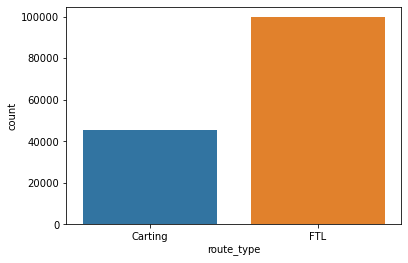

In [14]:
sns.countplot(data=df,x='route_type')

#We can see FTL is preferred route type compared to Carting and is more than double

### Removing null values and Converting time columns into pandas datatime

In [15]:
df = df.dropna(how='any')
df = df.reset_index(drop=True)

In [16]:
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

### Merging of rows and aggregation of fields

Grouping by sub-journey in the trip and taking cumulative sum. After taking cumulative sum we can take the last value for further analysis

In [19]:
df['segment_key'] = df['trip_uuid'] + df['source_center'] + df['destination_center']
 
segment = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']

for x in segment:
    df[x + '_sum'] = df.groupby('segment_key')[x].cumsum()
    
df[[x + '_sum' for x in segment]]

,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,14.0,11.9653,11.0
1,24.0,21.7243,20.0
2,40.0,32.5395,27.0
3,61.0,45.5619,39.0
4,67.0,49.4772,44.0
...,...,...,...
144311,92.0,65.3487,94.0
144312,118.0,82.7212,115.0
144313,138.0,103.4265,149.0
144314,155.0,122.3150,176.0


Aggregating the data at sub-journey level

In [20]:
Segment_dict = {
    
    'data' : 'first', 
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first', 
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'od_start_time' : 'first',
    'od_end_time' : 'first',
    'start_scan_to_end_scan' : 'first',
      
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
    
    }

In [22]:
segment_time = df.groupby('segment_key').agg(Segment_dict).reset_index()
segment_time = segment_time.sort_values(by=['segment_key','od_end_time'],ascending=True).reset_index()

In [24]:
segment_time.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0
2,2,trip-153671042288605164IND561203AABIND562101AAA,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,...,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,28.1995,26.0
3,3,trip-153671042288605164IND572101AAAIND561203AAB,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,...,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,55.9899,39.0
4,4,trip-153671043369099517IND000000ACBIND160002AAC,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,...,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,317.7408,231.0


In [27]:
segment_time[segment_time['trip_uuid'] == 'trip-153671041653548748']

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,...,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671041653548748IND209304AAAIND000000ACB,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,...,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,670.6205,534.0
1,1,trip-153671041653548748IND462022AAAIND209304AAA,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,...,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,649.8528,474.0


In [28]:
segment_time.shape

(26222, 21)

### Calculating the time taken between od_start_time and od_end_time

In [32]:
segment_time['od_time_diff_hour'] = (segment_time['od_end_time'] - segment_time['od_start_time']).dt.total_seconds() / (60)
segment_time['od_time_diff_hour']

0        1260.604421
1         999.505379
2          58.832388
3         122.779486
4         834.638929
            ...     
26217      62.115193
26218      91.087797
26219      44.174403
26220     287.474007
26221      66.933565
Name: od_time_diff_hour, Length: 26222, dtype: float64

### Aggregating the data at trip level

In [33]:
Trip_dict = {   
    'data' : 'first',
    'trip_creation_time': 'first',
    'route_schedule_uuid' : 'first', 
    'route_type' : 'first',
    'trip_uuid' : 'first',
    
    'source_center' : 'first',
    'source_name' : 'first',
    
    'destination_center' : 'last',
    'destination_name' : 'last',
    
    'start_scan_to_end_scan' : 'sum',    
    'od_time_diff_hour' : 'sum',
    
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',  
    }

In [34]:
trip_time = segment_time.groupby('trip_uuid').agg(Trip_dict).reset_index(drop=True)

In [35]:
trip_time.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.109800,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),180.0,181.611874,73.186911,143.0,68.0,85.1110,141.0,84.1894,65.0
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),3933.0,3934.362520,1927.404273,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),100.0,100.494935,17.175274,59.0,15.0,19.6800,59.0,19.8766,16.0
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),717.0,718.349042,127.448500,341.0,117.0,146.7918,340.0,146.7919,115.0


In [37]:
trip_time[trip_time['trip_uuid'] == 'trip-153671041653548748']

#We see that aftet grouping at trip_uuid level, the information of each trip is merged in a single row

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,od_time_diff_hour,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2259.0,2260.1098,824.732854,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0


In [38]:
trip_time.shape

#After performing all the aggregation the data now comprises of 14787 rows

(14787, 18)

### Doing hypothesis testing to check if the difference in distance of actual_distance_to_destination and osrm_distance is statistically significant or not

In [39]:
trip_time[['actual_distance_to_destination','osrm_distance']]

,actual_distance_to_destination,osrm_distance
0,824.732854,991.3523
1,73.186911,85.1110
2,1927.404273,2354.0665
3,17.175274,19.6800
4,127.448500,146.7918
...,...,...
14782,57.762332,73.4630
14783,15.513784,16.0882
14784,38.684839,58.9037
14785,134.723836,171.1103


In [41]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_ind_from_stats,binom,norm,poisson,geom
from scipy.stats import lognorm,norm, t,f_oneway,f,chi2,chisquare,chi2_contingency,pearsonr,spearmanr

In [43]:
# H0: mu1 = mu2 (There is no significant difference in actual_distance_to_destination and osrm_distance)
# Ha: mu1 != mu2 (There is significant difference in actual_distance_to_destination and osrm_distance)

c1 = trip_time['actual_distance_to_destination']
c2 = trip_time['osrm_distance']
t_stat, p_value = ttest_ind(c1, c2)

print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

7.65905658899532e-24
Reject H0


As per p-value is less than alpha there is significant difference in actual_distance_to_destination and osrm_distance.

### Doing hypothesis testing to check if the difference in distance of  actual_time and segment actual time is statistically significant or not

In [89]:
trip_time[['actual_time','segment_actual_time_sum']]

,actual_time,segment_actual_time_sum
0,143.0,141.0
1,59.0,59.0
2,341.0,340.0
3,61.0,60.0
4,24.0,24.0
...,...,...
12720,83.0,82.0
12721,21.0,21.0
12722,282.0,281.0
12723,264.0,258.0


In [90]:
# H0: mu1 = mu2 (There is no significant difference in actual_time and segment_actual_time_sum)
# Ha: mu1 != mu2 (There is significant difference in actual_time and segment_actual_time_sum)

c3 = trip_time['actual_time']
c4 = trip_time['segment_actual_time_sum']
t_stat, p_value = ttest_ind(c3, c4)

print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.4020519977918524
Fail to reject H0


As per p-value is more than alpha there is no significant difference in actual_time and segment_actual_time_sum

### Doing hypothesis testing to check if the difference in distance of actual_time and OSRM time is statistically significant or not

In [91]:
trip_time[['actual_time','osrm_time']]

,actual_time,osrm_time
0,143.0,68.0
1,59.0,15.0
2,341.0,117.0
3,61.0,23.0
4,24.0,13.0
...,...,...
12720,83.0,62.0
12721,21.0,12.0
12722,282.0,48.0
12723,264.0,179.0


In [92]:
# H0: mu1 = mu2 (There is no significant difference in actual_time and osrm_time)
# Ha: mu1 != mu2 (There is significant difference in actual_time and osrm_time)

c5 = trip_time['actual_time']
c6 = trip_time['osrm_time']
t_stat, p_value = ttest_ind(c5, c6)

print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

0.0
Reject H0


As per p-value is less than alpha there is significant difference in actual_time and osrm_time

## Feature Engineering

In [ ]:
Lowering the text-case of the columns

In [45]:
trip_time['destination_name'] = trip_time['destination_name'].str.lower()
trip_time['source_name'] = trip_time['source_name'].str.lower()

### Extracting source and destination state and city name

In [46]:
def source_statename(x):
    state = x.split('(')[1]
    return state[:-1]

In [83]:
def source_cityname(x):
    city = x.split(' (')[0]
    city = city.split('_')[0]
    
    #dealing with edge cases
    
    if city in ['pune balaji nagar','pnq pashan dpc','pnq rahatani dpc']:
        return 'pune'
       
    if city == 'bhopal mp nagar' : return 'bhopal'
    if city == 'hbr layout pc' : return 'bengaluru'
    if city == 'pnq vadgaon sheri dpc': return 'vadgaonsheri'
    if city == 'mumbai antop hill' : return 'mumbai'
    if city == 'banglore' or 'bengaluru': return 'bengaluru'
    
    return city

In [84]:
trip_time['destination_state'] = trip_time['destination_name'].apply(lambda x: source_statename(x)) 
trip_time['destination_city']  = trip_time['destination_name'].apply(lambda x: source_cityname(x)) 

In [85]:
trip_time['source_name_state'] = trip_time['source_name'].apply(lambda x: source_statename(x))
trip_time['source_name_city'] = trip_time['source_name'].apply(lambda x: source_cityname(x))

In [53]:
trip_time.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,destination_state,destination_city,source_name_state,source_name_city
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,1562.0,717.0,991.3523,1548.0,1320.4733,1008.0,uttar pradesh,kanpur,uttar pradesh,kanpur
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,143.0,68.0,85.1110,141.0,84.1894,65.0,karnataka,doddablpur,karnataka,doddablpur
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,3347.0,1740.0,2354.0665,3308.0,2545.2678,1941.0,haryana,gurgaon,haryana,gurgaon
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,59.0,15.0,19.6800,59.0,19.8766,16.0,maharashtra,mumbai,maharashtra,mumbai hub
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,341.0,117.0,146.7918,340.0,146.7919,115.0,karnataka,sandur,karnataka,bellary


### Converting trip_creation_time to datetime format and extracting year, month etx

In [54]:
trip_time['trip_creation_time'] = pd.to_datetime(trip_time['trip_creation_time'])
 
trip_time['trip_year'] = trip_time['trip_creation_time'].dt.year
trip_time['trip_month'] = trip_time['trip_creation_time'].dt.month
trip_time['trip_hour'] = trip_time['trip_creation_time'].dt.hour
trip_time['trip_day'] = trip_time['trip_creation_time'].dt.day
trip_time['trip_week'] = trip_time['trip_creation_time'].dt.isocalendar().week
trip_time['trip_dayofweek'] = trip_time['trip_creation_time'].dt.dayofweek

In [55]:
trip_time.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,source_name_state,source_name_city,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,kanpur_central_h_6 (uttar pradesh),IND209304AAA,kanpur_central_h_6 (uttar pradesh),2259.0,...,uttar pradesh,kanpur,uttar pradesh,kanpur,2018,9,0,12,37,2
1,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,karnataka,doddablpur,2018,9,0,12,37,2
2,training,2018-09-12 00:00:33.691250,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,gurgaon_bilaspur_hb (haryana),IND000000ACB,gurgaon_bilaspur_hb (haryana),3933.0,...,haryana,gurgaon,haryana,gurgaon,2018,9,0,12,37,2
3,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,maharashtra,mumbai hub,2018,9,0,12,37,2
4,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,karnataka,bellary,2018,9,0,12,37,2


## Checking outliers

In [64]:
numerical_fields = ['segment_osrm_time_sum','start_scan_to_end_scan','actual_distance_to_destination','actual_time',
                    'osrm_time','segment_actual_time_sum','segment_osrm_distance_sum','od_time_diff_hour']

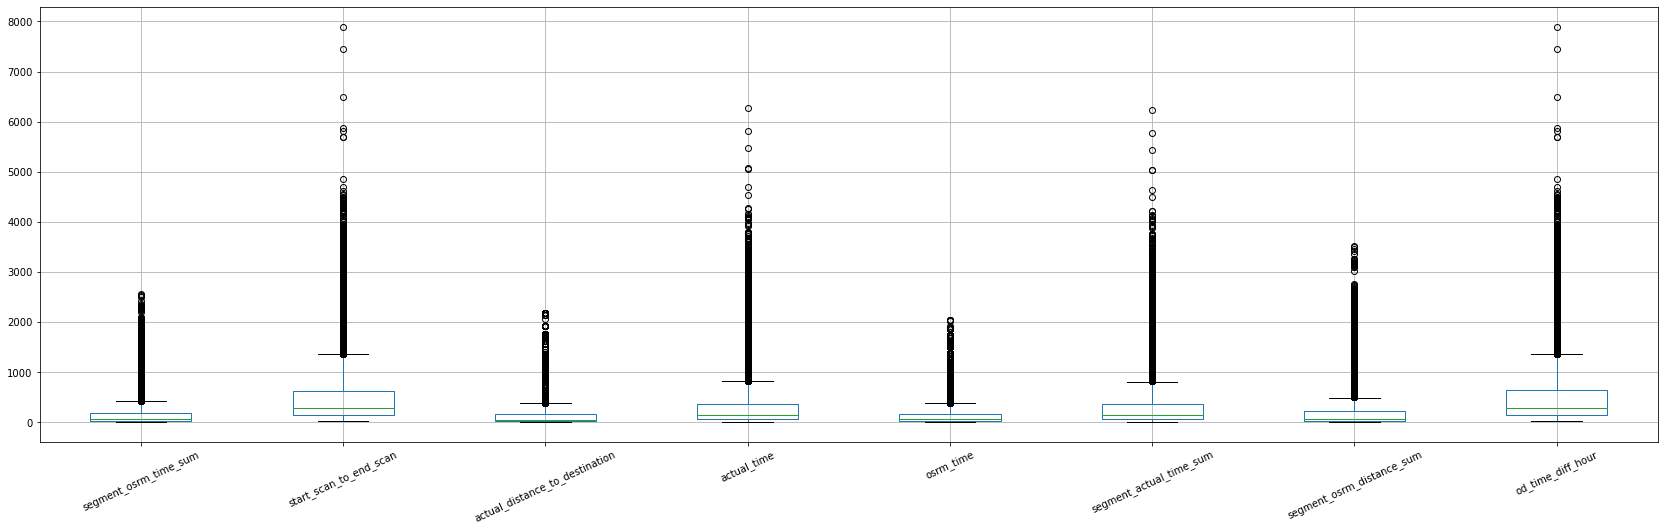

In [65]:
trip_time[numerical_fields].boxplot(rot=25, figsize=(29,8))

#### We will use IQR method to handle the outliers

In [67]:
Q1= trip_time[trip_time].quantile(0.25)
Q3= trip_time[numerical_fields].quantile(0.75)
IQR=Q3-Q1

In [69]:
trip_time = trip_time[~((trip_time[numerical_fields] < (Q1 - 1.5 * IQR)) | (trip_time[numerical_fields] > (Q3 + 1.5 * IQR))).any(axis=1)]
trip_time = trip_time.reset_index(drop=True)  

In [70]:
trip_time.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,source_name_state,source_name_city,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,karnataka,doddablpur,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,maharashtra,mumbai hub,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,karnataka,bellary,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,tamil nadu,chennai,tamil nadu,chennai,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,tamil nadu,chennai,tamil nadu,chennai,2018,9,0,12,37,2
5,training,2018-09-12 00:04:28.263977,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,trip-153671066826362165,IND560043AAC,hbr layout pc (karnataka),IND560043AAC,hbr layout pc (karnataka),146.0,...,karnataka,bengaluru,karnataka,bengaluru,2018,9,0,12,37,2
6,training,2018-09-12 00:05:40.333071,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,trip-153671074033284934,IND395009AAA,surat_central_d_12 (gujarat),IND395004AAB,surat_central_d_3 (gujarat),280.0,...,gujarat,surat,gujarat,surat,2018,9,0,12,37,2
7,training,2018-09-12 00:06:39.565253,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,trip-153671079956500691,IND110024AAA,delhi_lajpat_ip (delhi),IND110014AAA,delhi_bhogal (delhi),49.0,...,delhi,delhi,delhi,delhi,2018,9,0,12,37,2
8,training,2018-09-12 00:08:29.805514,thanos::sroute:580c788b-ff17-4c1b-9bbd-c59e7b0...,Carting,trip-153671090980523004,IND412105AAC,pune_north_d_3 (maharashtra),IND411017AAA,pnq rahatani dpc (maharashtra),72.0,...,maharashtra,pune,maharashtra,pune,2018,9,0,12,37,2
9,training,2018-09-12 00:11:40.783923,thanos::sroute:c2ee580f-f4b2-4fa5-98ab-0c5b327...,Carting,trip-153671110078355292,IND121004AAB,fbd_balabhgarh_dpc (haryana),IND121001AAA,faridabad (haryana),38.0,...,haryana,faridabad,haryana,fbd,2018,9,0,12,37,2


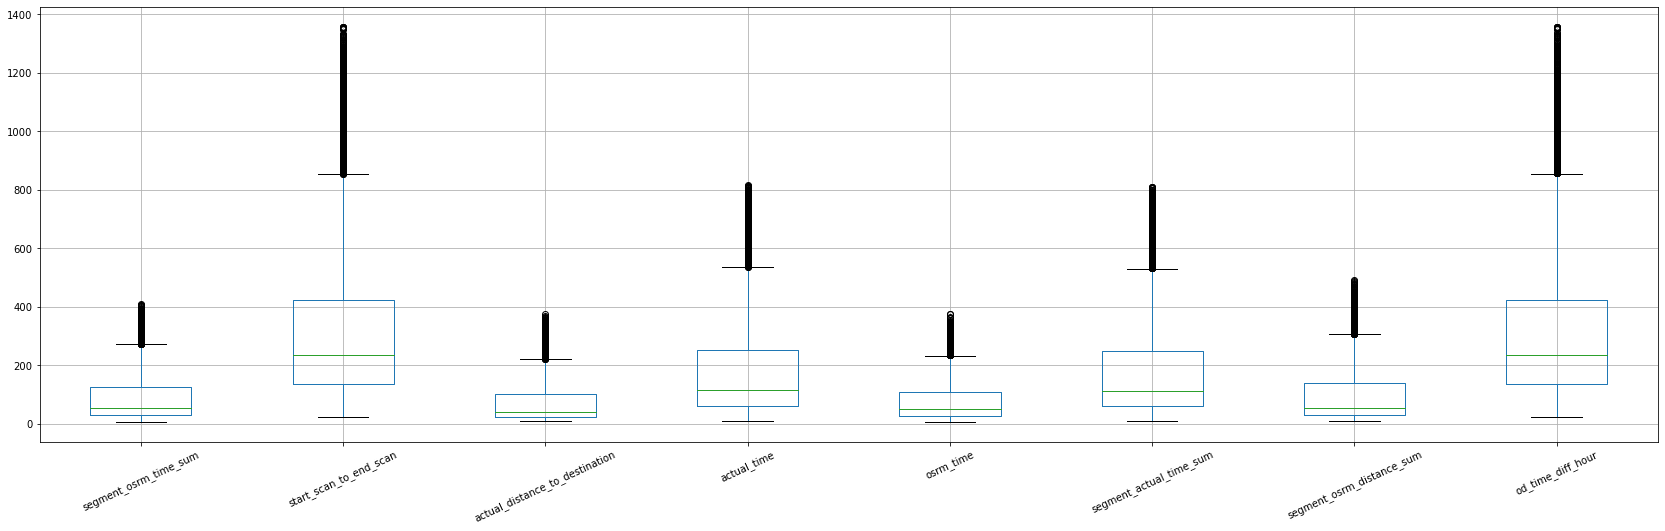

In [71]:
trip_time[numerical_fields].boxplot(rot=25, figsize=(29,8))

We see from the above boxplot is that all the outliers are now removed

### Handling Categorical features

In [72]:
trip_time['route_type'].value_counts()

Carting    8812
FTL        3913
Name: route_type, dtype: int64

In [73]:
trip_time['route_type'] = trip_time['route_type'].map({'Carting':1,'FTL':0})

In [74]:
trip_time.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,...,destination_state,destination_city,source_name_state,source_name_city,trip_year,trip_month,trip_hour,trip_day,trip_week,trip_dayofweek
0,training,2018-09-12 00:00:22.886430,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,1,trip-153671042288605164,IND561203AAB,doddablpur_chikadpp_d (karnataka),IND561203AAB,doddablpur_chikadpp_d (karnataka),180.0,...,karnataka,doddablpur,karnataka,doddablpur,2018,9,0,12,37,2
1,training,2018-09-12 00:01:00.113710,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,1,trip-153671046011330457,IND400072AAB,mumbai hub (maharashtra),IND401104AAA,mumbai_mirard_ip (maharashtra),100.0,...,maharashtra,mumbai,maharashtra,mumbai hub,2018,9,0,12,37,2
2,training,2018-09-12 00:02:09.740725,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,0,trip-153671052974046625,IND583101AAA,bellary_dc (karnataka),IND583119AAA,sandur_wrdn1dpp_d (karnataka),717.0,...,karnataka,sandur,karnataka,bellary,2018,9,0,12,37,2
3,training,2018-09-12 00:02:34.161600,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,1,trip-153671055416136166,IND600056AAA,chennai_poonamallee (tamil nadu),IND600056AAA,chennai_poonamallee (tamil nadu),189.0,...,tamil nadu,chennai,tamil nadu,chennai,2018,9,0,12,37,2
4,training,2018-09-12 00:04:22.011653,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,1,trip-153671066201138152,IND600044AAD,chennai_chrompet_dpc (tamil nadu),IND600048AAA,chennai_vandalur_dc (tamil nadu),98.0,...,tamil nadu,chennai,tamil nadu,chennai,2018,9,0,12,37,2


### Checking some relationship between aggregated fields

In [86]:
#Checking the Top 5 states with highest number of orders

top_5_state = trip_time['source_name_state'].value_counts().index[:5]
top_5_state

Index(['maharashtra', 'karnataka', 'haryana', 'tamil nadu', 'telangana'], dtype='object')

In [96]:
#Checking the Top 5 Cities with highest number of orders

top5_city = trip_time['source_name_city'].value_counts().index[:5]
top5_city

Index(['bengaluru', 'pune', 'vadgaonsheri', 'mumbai', 'bhopal'], dtype='object')

### Normalizing the numerical features using StandardScaler

In [93]:
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
scaler.fit(trip_time[numerical_fields])

StandardScaler()

In [97]:
trip_time[numerical_fields] = scaler.transform(trip_time[numerical_fields])

In [99]:
trip_time[numerical_fields].head()

,segment_osrm_time_sum,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,segment_actual_time_sum,segment_osrm_distance_sum,od_time_diff_hour
0,-0.262980,-0.548722,0.011468,-0.218202,-0.144787,-0.221843,-0.145810,-0.545016
1,-0.877957,-0.861704,-0.764971,-0.748955,-0.876748,-0.743427,-0.823338,-0.861959
2,0.364546,1.552167,0.763647,1.032859,0.531932,1.043954,0.513700,1.552143
3,-0.790103,-0.513512,-0.662089,-0.736318,-0.766263,-0.737066,-0.737077,-0.510335
4,-0.915608,-0.869529,-0.876904,-0.970102,-0.904369,-0.966055,-0.906123,-0.871685


### Business Insights

- 1) The top 5 states with most orders are Maharashtra, Karnataka, Haryana, Tamil nadu and Telangana.
- 2) The top 5 cities with most orders are Bengaluru, Pune, Vadgaonsheri, Mumbai and Bhopal.
- 3) The preferred route type is FTL compared to Carting and is more than double than that of Carting.
- 4) The Orsm parameters has significant difference than actual parameters.

### Recommendations

- 1) We can increase the number of delivery agents and delivery vehicles in the states and cities where we see traffic is high and number of orders are large to reduce the delivery time.
- 2) In Monsoon season where delivery time is usually high we can setup temporary checkpoints at a regular distance so that it becomes easy for delivery partners as they have to travel less and can handover the parcel to another checkpoint.
- 3) During non-festive seasons where number of orders are low company should try to give some promotional discounts to increase the sales.
- 4) Since the Orsm parameters has significant difference than actual parameters, tech team can try to work on this and improve the model accuracy.